In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
#def rgb2gray(rgb):
#    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
#I = plt.imread('im1.jpg')
#s=I.ndim
#if s==3:
#    I = rgb2gray(I)


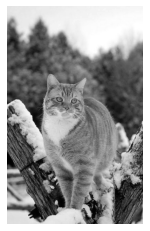

In [2]:
I = cv2.imread('imcolor4.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
fig1=plt.figure(figsize = (4,4))
plt.imshow(I, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

In [3]:
inmax = np.amax(I)
inmin = np.amin(I)
print('min=',inmin,'max=',inmax)
Size=I.shape

min= 0 max= 255


## Linear enhancement

In [4]:
Im=255*((I-inmin)/(inmax-inmin))
inmax = np.amax(Im)
inmin = np.amin(Im)
print('min=',inmin,'max=',inmax)

min= 0.0 max= 255.0


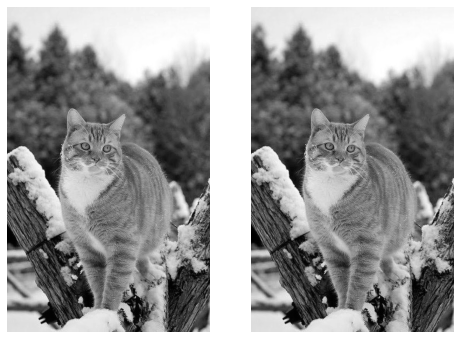

In [5]:
fig2=plt.figure(figsize = (8,8))
a = fig2.add_subplot(1, 2, 1)
plt.imshow(I, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

b = fig2.add_subplot(1, 2, 2)
plt.imshow(Im, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

## log and exp enhancement

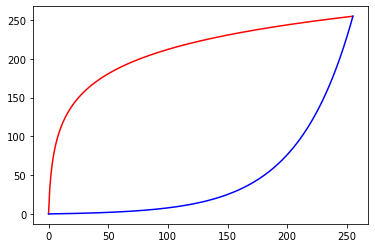

In [6]:
x=np.linspace(0, 255, num=256)
c=255/np.log(1+255)
logt=c*np.log(1+x)
inv_log=np.exp(x/c)-1
plt.plot(x,logt, label="Log'(x)" , color = "red" )
plt.plot(x,inv_log, label="Inverse_log'(x)" , color = "blue" )

In [7]:
c=255/np.log(1+255)
Il=c*np.log(1+I)
Il=Il.astype(np.uint8)
inmax = np.amax(Il)
inmin = np.amin(Il)
print('min=',inmin,'max=',inmax)

min= 0 max= 255


/tmp/ipykernel_476/3875672158.py:2: RuntimeWarning: divide by zero encountered in log
  Il=c*np.log(1+I)


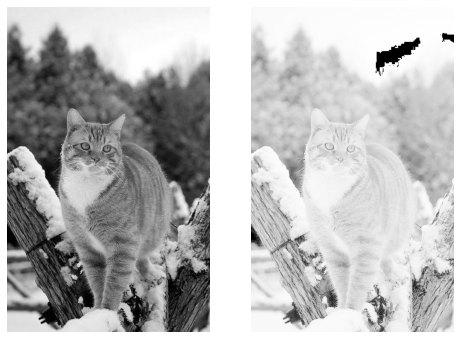

In [8]:
fig3=plt.figure(figsize = (8,8))
a = fig3.add_subplot(1, 2, 1)
plt.imshow(I, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');

b = fig3.add_subplot(1, 2, 2)
plt.imshow(Il, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');

In [9]:
c=255/np.log(1+255)
I2=np.exp(I/c)-1
I2=I2.astype(np.uint8)
inmax = np.amax(I2)
inmin = np.amin(I2)
print('min=',inmin,'max=',inmax)

min= 0 max= 254


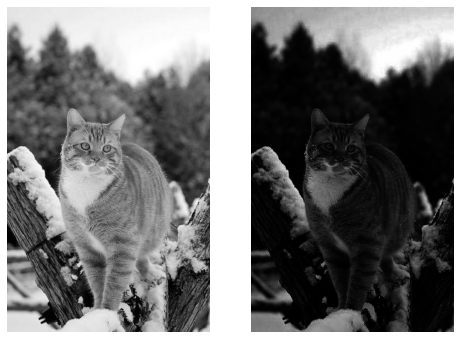

In [10]:
fig4=plt.figure(figsize = (8,8))
a = fig4.add_subplot(1, 2, 1)
plt.imshow(I, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');

b = fig4.add_subplot(1, 2, 2)
plt.imshow(I2, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');

## Gamma correction

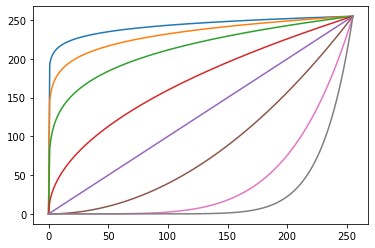

In [11]:
x=np.linspace(0, 255, num=256)
vg=np.array([0.05, 0.1,0.2, 0.5, 1, 2, 5, 10]) 
for i in vg:
    c=255/(255**i)
    gamma=c*(x**i)
    plt.plot(x,gamma)

min= 0 max= 255


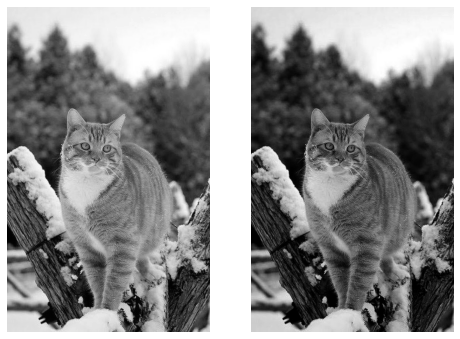

In [17]:
maxi = np.amax(I)
vg=1.5      #Change the gamma value
c=255/(maxi**vg)
I2=c*np.float32(I)**vg
I2=I2.astype(np.uint8)
inmax = np.amax(I2)
inmin = np.amin(I2)
print('min=',inmin,'max=',inmax)

fig5=plt.figure(figsize = (8,8))
a = fig5.add_subplot(1, 2, 1)
plt.imshow(I, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');

b = fig5.add_subplot(1, 2, 2)
plt.imshow(I2, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');

## Negative

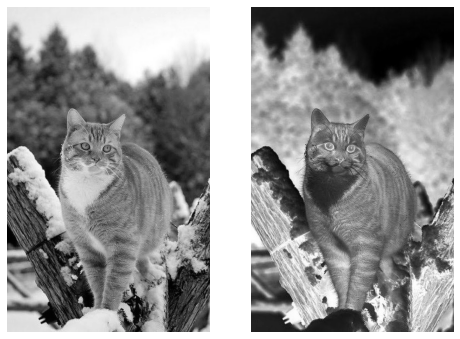

In [13]:
I3=255-I
fig5=plt.figure(figsize = (8,8))
a = fig5.add_subplot(1, 2, 1)
plt.imshow(I, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');

b = fig5.add_subplot(1, 2, 2)
plt.imshow(I3, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');